In [ ]:
import tensorflow as tf;
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout;
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data();

In [ ]:
x_train=np.expand_dims(x_train,-1);
x_test =np.expand_dims(x_test,-1);
x_train=x_train/255.0
x_test=x_test/255.0
K=len(set(y_train))

In [ ]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,padding='same',activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,padding='same',activation='relu')(x)
x=Flatten()(x)
x=Dense(64,activation='relu')(x)
x=Dense(K,activation='softmax')(x)
model=tf.keras.Model(i,x)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
out=model.fit(x_train,y_train,batch_size=100,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
600/600 [==============================] - 5s 4ms/step - loss: 0.7197 - accuracy: 0.7524 - val_loss: 0.3863 - val_accuracy: 0.8640
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3411 - accuracy: 0.8792 - val_loss: 0.3344 - val_accuracy: 0.8790
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2834 - accuracy: 0.8968 - val_loss: 0.2998 - val_accuracy: 0.8911
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2591 - accuracy: 0.9072 - val_loss: 0.2917 - val_accuracy: 0.8916
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2349 - accuracy: 0.9137 - val_loss: 0.2792 - val_accuracy: 0.8964
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2044 - accuracy: 0.9250 - val_loss: 0.2897 - val_accuracy: 0.8923
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1846 - accuracy: 0.9324 - val_loss: 0.2614 - val_accuracy: 0.9049
Epoch 

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 220,234
Trainable params: 220,234
Non-trainable params: 0
_______________________________________________________

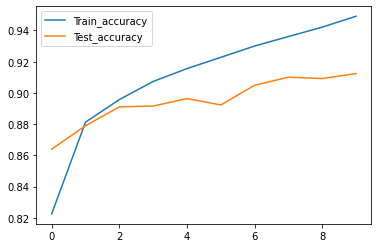

In [ ]:
plt.plot(out.history['accuracy'],label='Train_accuracy')
plt.plot(out.history['val_accuracy'],label='Test_accuracy')
plt.legend()
plt.show()

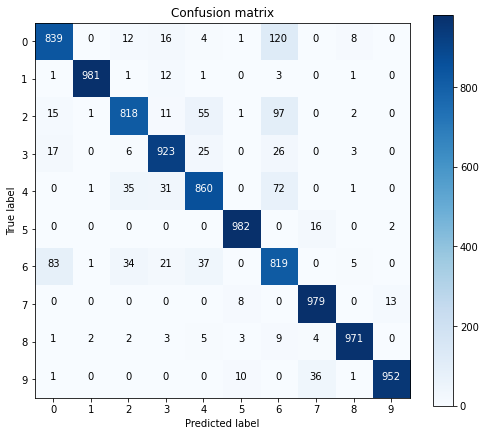

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,num_classes):
  plt.figure(figsize=(7,6))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix");
  plt.colorbar()
  plt.xticks(np.arange(num_classes));
  plt.yticks(np.arange(num_classes));
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], 'd'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black");
  plt.tight_layout();
  plt.ylabel('True label');
  plt.xlabel('Predicted label');
  plt.show()
y_pred=np.argmax(model.predict(x_test),axis=1)
plot_confusion_matrix(confusion_matrix(y_test,y_pred),K);

In [ ]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

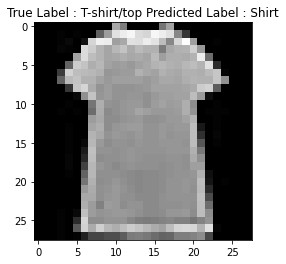

In [ ]:
mismatch_idx=np.where((y_pred==6)&(y_test==0))[0]
i=np.random.choice(mismatch_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True Label : {} Predicted Label : {}".format(labels[y_test[i]],labels[y_pred[i]]))
plt.show()